# Classification Algorithms and their Implementations

**Supervised Learning**:  *Infer rule/function depending upon the target variable.* 

In the process of supervised learning, there are several approaches in place like classification, clustering, Neural Nets, reinforcement learning and other.Here we will try to implement classification algorithms on the already cleansed and preprocessed data. Listed below are a few that will be implemented here. Note: The data used is preprocessed, hence we will directly move to applying the algorithms on the data after a brief analysis.

 - Logistic Regression
 - Decision Tree Algorithm
 - K-Nearest Neighbor
 - Random Forest
 - Support Vector Machine (SVM)
 - Naive Bayes Classifier
 - Artificial Neural Network
 - Gradient Boosting Algorithms
      - XGBoost
 

## Importing the data from given location and reading it

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs

In [0]:
## Let's work with dummy data here for a while

np.random.seed(42)
train_data = np.random.normal(size= (100,2)) #<-mean 0.0
train_labels= np.zeros(100)

train_data = np.r_[train_data, np.random.normal(size = (100,2), loc = 2)]
train_labels= np.r_[train_labels, np.ones(100)]

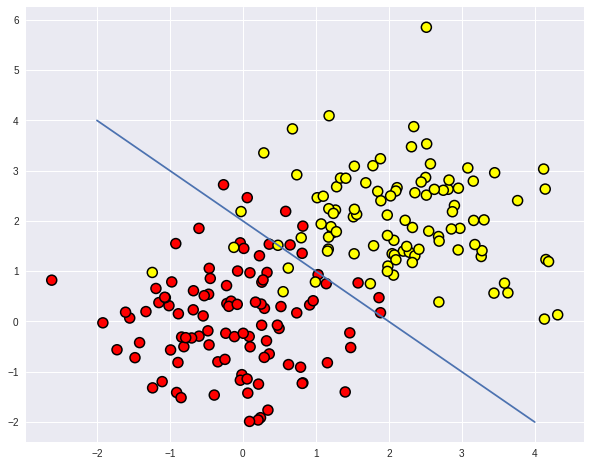

In [0]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4,-3,-1));

### Diving into DecisionTree Classifier using the dummy data created above.

In [0]:
from sklearn.tree import DecisionTreeClassifier

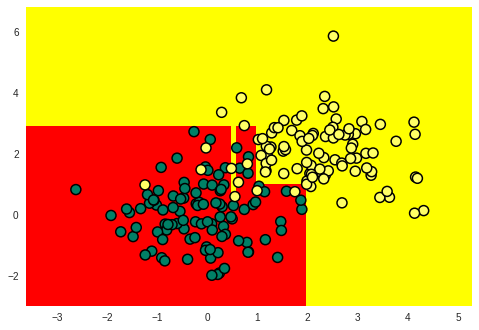

In [0]:
## Usually we do train test split before applying the classification algorithms
## Will not do that here

def get_grid(data):
    
    ## What we need? -> end points ongrid on both axis, and what each small grid dimension are.
    
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    
    return np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

dtree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 5)
dtree.fit(train_data, train_labels)

x_test, x_test_1 = get_grid(train_data)

## Now, to make it look like two columns, it's important to combine them
y_pred = dtree.predict(np.c_[x_test.ravel(), x_test_1.ravel()]).reshape(x_test.shape)
plt.pcolormesh(x_test, x_test_1, y_pred, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels*5, s=100, 
            cmap='summer', edgecolors='black', linewidth=1.5);


In [0]:
## To make the visualisation even better, we will create a mesh grid on top of the plotted points
!pip install pydotplus

In [0]:
## Let's see how the tree looks
import pydotplus as pdp
from sklearn.tree import export_graphviz

def tree_to_png_file(dtree_object, features, out_png_file):
  
    ##Step 1: Get the string representation of the dtree i.e. the DOT form
    dot_data = export_graphviz(dtree_object, out_file = None, filled = True)
    
    ## Step 2: DOT data -> Graph
    
    graph_obj = pdp.graph_from_dot_data(dot_data)
    
    ## Step 3: Write the graph to a png/svg file. Depends on you.
    
    graph_obj.write_png(out_png_file)    

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
tree_to_png_file(dtree_object = dtree, features=['x1', 'x2'], 
                  out_png_file='/content/gdrive/My Drive/Colab Notebooks/topic3_tree1.png')

## Three simple questions.

### What happens when the target varible isn't a class of values and are continuous values instead?

=> It's a regression problem.

### In the above case, do we still use gini/entropy/gain as the parameter to decide which split is better in a dtree?

=> Variance will be taken into consideration instead of gini or entropy.

### So, the next question, what is variance and how it looks?

$ Variance (V) = \sum_{i= 1}^N \frac{X - \mu^2 }{N}$

So here, we are checking the variance of the target variable as we make decision w.r.t the target variable here. So suppose $y_i$ is the target variable, so the above formula can now be visualised as;

$ Variance (V) = \frac{1}{N} \sum_{i=1}^N (y_i - \frac{1}{N} \sum_{j=1}^N y_j^2)$



## Steps to be followed

- Step1: Create dummy $X_{train}$ and $X_{test}$
- Step2: Apply the formula on the created $X_{train}$ and $X_{test}$ to get $y_{train}$ and $y_{test}$

    $f(x) = e^{-x^2} + 1.5 \times e^{-(x-2)^2} $
- Step3: Train the model on $X_{train}$ and $y_{train}$
- Step4: Test the model on $X_{test}$ and get $y_{pred}$
- Step5: After testing, do some data visualisation


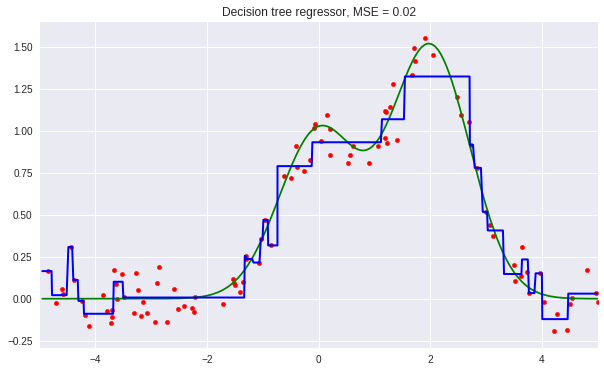

In [0]:
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)
  
def generate_dummy(no_samples, noise_val):
    
    X = np.random.rand(no_samples)*10 - 5 #to get values >1
    X = np.sort(X).ravel()
    y = np.exp(-X**2) + (1.5) * (np.exp(-(X-2)**2)) + np.random.normal(0.0, noise_val, no_samples)
    X = X.reshape((no_samples, 1))
    return X, y

  
X_train, y_train = generate_dummy(100, noise_val=0.1)
X_test, y_test = generate_dummy(1000, noise_val=0.1)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "g")
plt.scatter(X_train, y_train, c="r", s=20)
plt.plot(X_test, reg_tree_pred, "b", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / 1000))
plt.show()
    

# K-Nearest Neighbors Classifier

- Find the k nearest training samples for a given test sample
- From the k-nearest samples found, the class with the maximum count in them is the class of the test sample
- For regression problem, mean of the values of all k-nearest samples is found and on the basis of that a value is assigned to the test sample
---
Rules:

1.  *The value of k becomes a parameter here. For finding the best optimal value of k, we use cross validation, usually, k-cross-validation.*


2. *K-NN is used in recommendation is also one of the comprehensible algorithms after decision tree*


3. *K-NN requires scaling the data before applying the algorithm as the distance should not be more inclined on the salary then age as salary is usually bigger than age. Use of StandardScaler() from sklearn.preprocessing is made for this purpose here*

---



In [0]:
primary_dataset = pd.read_csv('/content/gdrive/My Drive/DataSets/BigML_Churn.csv')

In [0]:
primary_dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Scaling, OneHotEncoding or Factorisation, and cleansing

**Step 1**. In the above data, we will find the columns with the datatype other than numerical and see it


In [0]:
set(primary_dataset.columns) - set(primary_dataset._get_numeric_data().columns)

{'International plan', 'State', 'Voice mail plan'}

**Step 2**. Apart from the above, target column 'Churn' is boolean too. Need to work on all these.

In [0]:
primary_dataset['International plan'] = pd.factorize(primary_dataset['International plan'])[0]
primary_dataset['Voice mail plan'] = pd.factorize(primary_dataset['Voice mail plan'])[0]
primary_dataset['Churn'] = primary_dataset['Churn'].astype('int')

**Step 3.** We don't find the need of the State here. Additionally, *Churn* is the target variable and hence becomes *y*.

In [0]:
y = primary_dataset['Churn']
states = primary_dataset['State']

primary_dataset= primary_dataset.drop(['Churn', 'State'], axis = 1) ## axis = 0 for each row, each column
                                                                    ## axis = 1 for each column, each row

**Step 4:** K-NN needs Scaling, so we will apply that when needed

## Application of Algorithms; Decision Tree, K-NN, Random Forest

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [0]:
# Before applying the classifiers and regressors, let's split the data into hold-out/held-out sets.
# They can also be referred as train and test split.

X_train, X_dev, y_train, y_dev = train_test_split(primary_dataset, y, test_size = 0.7, random_state = 42)

In [0]:
dtree_ds = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state = 42)
dtree_ds.fit(X_train, y_train)
## For K-NN we need to scale the data, let's do that first

ss_knn = StandardScaler()
X_train_s = ss_knn.fit_transform(X_train)
X_dev_s = ss_knn.transform(X_dev)

k_nn1 = KNeighborsClassifier(n_neighbors= 5)
k_nn1.fit(X_train_s, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
## Testing the model on the basis of the dev set to find the accuracy and confusion matrix too.
## As it is a classification model, we can get confusion matrix but not for regression problems
from sklearn.metrics import confusion_matrix, classification_report

y_pred_tree = dtree_ds.predict(X_dev_s)
cm_tree = confusion_matrix(y_dev, y_pred_tree)
print(cm_tree)
print(classification_report(y_dev, y_pred_tree))

[[1867  131]
 [ 238   98]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1998
           1       0.43      0.29      0.35       336

   micro avg       0.84      0.84      0.84      2334
   macro avg       0.66      0.61      0.63      2334
weighted avg       0.82      0.84      0.83      2334



In [0]:
y_pred_knn = k_nn1.predict(X_dev_s)
cm_knn = confusion_matrix(y_dev, y_pred_knn)
print(cm_knn)
print(classification_report(y_dev, y_pred_knn))

[[1963   35]
 [ 265   71]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1998
           1       0.67      0.21      0.32       336

   micro avg       0.87      0.87      0.87      2334
   macro avg       0.78      0.60      0.63      2334
weighted avg       0.85      0.87      0.84      2334



## Wait, Wait, Wait......

We selected the parameters and hyperparameters for both the algorithms, but, have we done that efficiently? No. 

----

**k-cross-validation:**  Data is trained and tested for *k* times where the model  is trained on *k-1* slots of the data and tested on the remaining  *1* slot. After the validation process is completed, we can retrieve the best parameters using *best_params* method.

In [0]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [0]:
params = [{'knn2__n_neighbors' : range(1, 20)}, 
          {'max_depth': range(1, 20), 'max_features': range(5, 15)}
         ]

In [0]:
## Let's do for decision tree first
dtree_grid_ds = GridSearchCV(dtree_ds, params[1], cv = 5, n_jobs = -1, verbose = True)
dtree_grid_ds.fit(X_train, y_train)

Fitting 5 folds for each of 190 candidates, totalling 950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 950 out of 950 | elapsed:    6.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 20), 'max_features': range(5, 15)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [0]:
dtree_grid_ds.best_params_

{'max_depth': 7, 'max_features': 12}

In [0]:
dtree_grid_ds.best_score_

0.923923923923924

In [0]:
## Time to validate the results using the dev set

y_pred_grid_tree = dtree_grid_ds.predict(X_dev)
cm_grid_tree = confusion_matrix(y_dev, y_pred_grid_tree)
print(cm_grid_tree)
print(classification_report(y_dev, y_pred_grid_tree))

[[1944   54]
 [ 114  222]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1998
           1       0.80      0.66      0.73       336

   micro avg       0.93      0.93      0.93      2334
   macro avg       0.87      0.82      0.84      2334
weighted avg       0.92      0.93      0.93      2334



In [0]:
## For doing the grid search for k-NN, we can use the X_train_s and X_test_s.
## But, Let's learn something about pipeline concept 

##Syntax stands as Pipeline([(<name of object>, <value of the object>), (....), (....),...,(....)])
##Also, for params, all the parameters should be preceded with the <name of the object>__<the parameter name>
##For e.g. knn2__n_neighbors for n_neighbors parameter.

from sklearn.pipeline import Pipeline

pp_knn = Pipeline([('scaler_knn', StandardScaler()), ('knn2', KNeighborsClassifier(n_neighbors = 5))])

pp_grid = GridSearchCV(pp_knn, params[0], cv = 5, n_jobs = -1, verbose = True)
pp_grid.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  95 out of  95 | elapsed:    3.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler_knn', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn2', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn2__n_neighbors': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [0]:
print(pp_grid.best_params_)
print(pp_grid.best_score_)

{'knn2__n_neighbors': 3}
0.8828828828828829


In [0]:
y_pred_knn_grid2 = pp_grid.predict(X_dev)
cm_knn_grid2 = confusion_matrix(y_dev, y_pred_knn_grid2)
print(cm_knn_grid2)
print(classification_report(y_dev, y_pred_knn_grid2))

[[1944   54]
 [ 249   87]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1998
           1       0.62      0.26      0.36       336

   micro avg       0.87      0.87      0.87      2334
   macro avg       0.75      0.62      0.65      2334
weighted avg       0.85      0.87      0.85      2334



/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


# Random Forest Classifier

Classification using *n-trees* will leading to random forest classification algorithm. Many a times, it is requires high computation power. Also, not guaranteed for better performance than decision-trees.

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
forest_clf = RandomForestClassifier(n_estimators = 15, verbose = True, random_state = 42)
cross_val_mean = np.mean(cross_val_score(forest_clf, X_train, y_train, cv = 5))
print(cross_val_mean)

0.9299282482062052


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [0]:
forest_clf.get_params().keys() ##<- to know the list of all parameters to the estimator

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [0]:
## Let's do  grid search to find optimal values of the parameters 
params_forest = [{'n_estimators': range(1, 20), 
                  'max_depth': range(1, 20),
                 'max_features': range(5, 12)}]
forest_grid = GridSearchCV(forest_clf, params_forest, cv = 5, verbose = True, n_jobs = -1)
forest_grid.fit(X_train, y_train)

In [0]:
print(forest_grid.best_params_)
print(forest_grid.best_score_)

In [0]:
y_pred_fgrid = forest_grid.predict(X_dev)
cm_f_grid = confusion_matrix(y_dev, y_pred_fgrid)
print(cm_f_grid)
print(classification_report(y_dev, y_pred_fgrid))

[[1966   32]
 [ 113  223]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1998
           1       0.87      0.66      0.75       336

   micro avg       0.94      0.94      0.94      2334
   macro avg       0.91      0.82      0.86      2334
weighted avg       0.94      0.94      0.93      2334



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished


In [0]:
## Work with digits

from sklearn.datasets import load_digits

ds = load_digits()
X_ds, y_ds = ds.data, ds.target
print(X_ds.shape)

(1797, 64)


In [0]:
print(X_ds[:,0])

[0. 0. 0. ... 0. 0. 0.]


In [0]:
print(X_ds[0].reshape(8,8))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


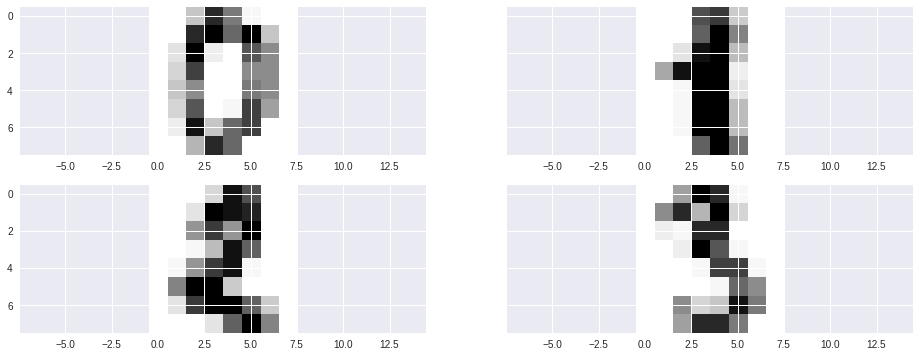

In [0]:
f, axes = plt.subplots(2, 2, sharey=True, figsize=(16,6)) #1 row 4 columns and share the y axis
counter = 0
for i in range(2):
  for j in range(2):
    # for each of the each column represent one number
    axes[i, j].imshow(X_ds[counter,:].reshape([8,8]), cmap='Greys');
    counter += 1

# Naive-Bayes Classifier

What is bayesian classification?

-> Before explaining about bayesian classification, it's important to know about two terms (i) Frequentist (ii) Probabilistic

**Frequentist:**  

- depends on likelihood i.e $ P(data \mid class)$ for observed or unobserved data
- doesn't require prior probabiliy
- doesn't use hypothesis or probabilities

**Bayesian/Probabilistic:**

- Uses prior probability and likelihood  of the observed data for the unobserved data
- uses hypothesis or probabilities
- Bayesian formula is as:

  $P(class \mid data) = P(data \mid class) \times \frac{P(class)}{P(data)} \space \space \space \cdots \cdots (1)$ 
  

From above two terms, we can conclude that bayesian classification is a probabilistic approach where the belief of a certain event occuring plus the likelihood is used to calculate the posterior probability. Looking at above formula (1), we predict the class of the unobserved data from the prior probability of that class and the data along with the likelihood of data for a certain class.

Also, the data distribution holds certain importance while prediciting the probability of it falling into a certain class. It can be Gaussian(normal) Distribution, Multinomail, Bernoulli, Binomial and other.

**Tips**:

1. If the data is not normally distributed, make some transformations and get it normally distributed

2. Use 'Laplace Smoothing' to get rid of'zero-frequency' problem.

3. Correlated features should be removed.

**Note:** More features doesn't mean better model. For no correlated data SVM or Neural network works but for the linear correlated data, a normal linear regression works too. To reduce the dimensions, algorithms like PCA(Principal Component Analysis) can be used.

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
nb_model = GaussianNB()
print(nb_model.get_params().keys())
nb_model.fit(X_train, y_train)
print(nb_model.class_count_)
y_pred = nb_model.predict(X_dev)

dict_keys(['priors', 'var_smoothing'])
[852. 147.]


In [0]:
from sklearn.metrics import classification_report
cf = classification_report(y_dev, y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1998
           1       0.50      0.49      0.49       336

   micro avg       0.85      0.85      0.85      2334
   macro avg       0.70      0.70      0.70      2334
weighted avg       0.85      0.85      0.85      2334



# Support Vector Machines

Before we start, a few simple questions?

**1. What are support vectors?**

-> The data points in the xy plane are the support vectors.

**2. What is support vector machine?**

-> The hyperplane seperating the two different class of data is called the support vector machine.

**3. How to find the right Hyperplane?**

-> The hyperplane that maximizes the margin and has the minimum classification error is supposed to be the right hyperplane.

**4. Which one is considered first? maximum classification or maximum margin?**

-> Maximum classification or minimum classification error

**5. What is the data is non-linear?**

-> In case of non-linear relationship between data, *kernel* parameter can be used and its value can be changed from 'linear' to 'rbf' or any other appropriate.

**6. Which library is used for SVM?**

-> from sklearn.svm import svc


**Time for some tips:**

- Avoid SVM when the data contains comparatively high noise
- Avoid SVM when the data is too high as it takes time to train the model
- Don't make the value of gamma too high, it leads to overfitting
- If the data is non-linearly related, use the degree parameter too along with kernel parameter if the data is of kind $z = x^2 + y^2$ or $z = x^3 + y^2$

In [0]:
from sklearn import svm
from sklearn.metrics import classification_report

In [0]:
svm_clf = svm.SVC(kernel= 'linear', C = 1, gamma = 1)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_dev)
print(classification_report(y_dev, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1998
           1       0.00      0.00      0.00       336

   micro avg       0.86      0.86      0.86      2334
   macro avg       0.43      0.50      0.46      2334
weighted avg       0.73      0.86      0.79      2334



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
svm_clf.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])